In [1]:
# Carter Brown
# Created: December 23, 2016
# Modifyd: January  09, 2017

In [21]:
# Inspired by WildML
# Attempting to make more modular and abstracted
# Adding more documentation
# Classification problem on two classes

In [9]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%pylab inline
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Some Global Variables
TRAINING_SIZE = 200
TRAINING_NOISE = 0.20
SPACE_DIM = 2
NUM_CLASSES = 2

# Grad Desc parameters (default vals chosen by WildML)
EPSILON = 0.01 # learning rate
REG_LAMBDA = 0.01 # regularization strength

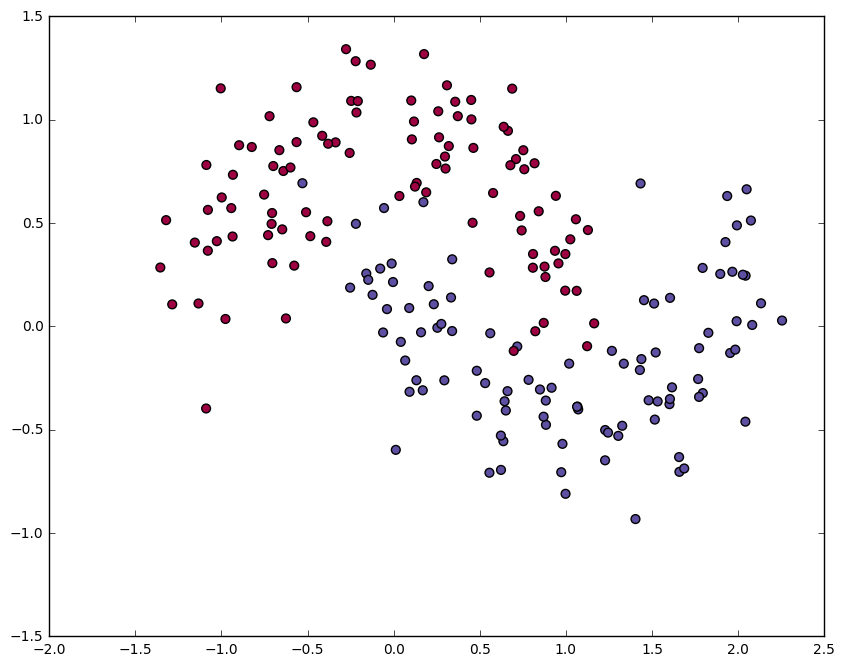

In [3]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(TRAINING_SIZE, noise=TRAINING_NOISE)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [97]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [98]:
def plot_decision_boundary(pred_func):
    """ @param pred_func is a prediction fct (i.e. logistic regression
            predictor, neural net, etc.)
        Effect: Plots decision bndry of prediction fct
            Colors plot space based on decision boundary
            from WildML """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    # Generate grid of pts with dist h between
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

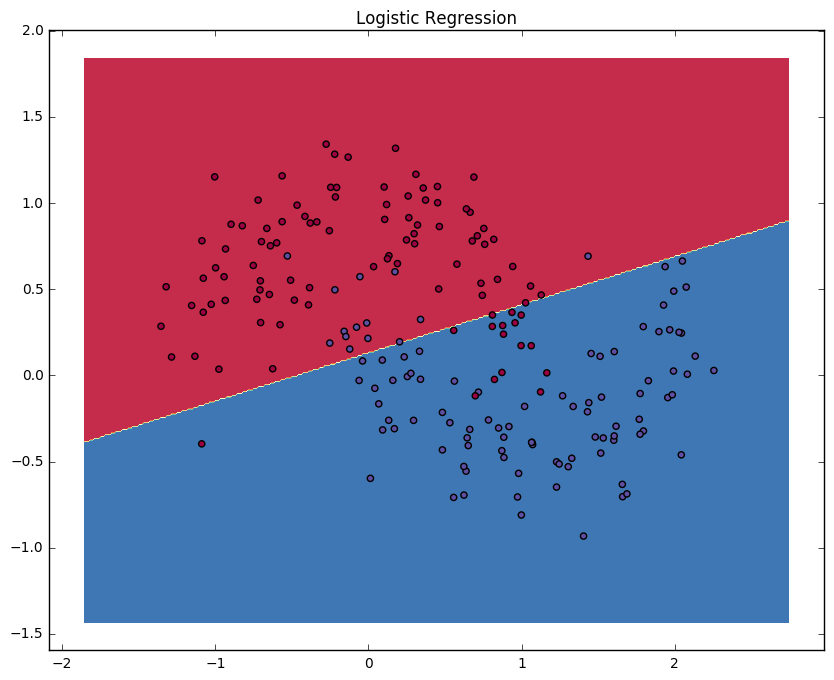

In [99]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [45]:
def inst_model(hidden_layers):
    """ @param hidden_layers is an array containing the sizes of subsequent
            hidden layers
        Returns: basic neural network model with random weights
        Precondition: each element of hidden_layers is positive integer"""
    np.random.seed(0)
    num_hidds = hidden_layers.shape[0]
    Wlst = []
    blst = []
    if (num_hidds==0): # case where don't pass anything
        Wlst += [np.random.randn(SPACE_DIM,NUM_CLASSES) / np.sqrt(SPACE_DIM)]
        blst += [np.zeros((1,NUM_CLASSES))]
        print("no hidden layer dimensions passed...\ninstantiating random weights")
        return {'Wlist':Wlst,'blist':blst}
    else:
        inc_dim=0
        out_dim=0
        for layer in arange(num_hidds):
            print("instantiating random weights...")
            if (layer == 0):
                inc_dim = SPACE_DIM
            else:
                inc_dim = hidden_layers[layer-1]
            out_dim = hidden_layers[layer]
            Wlst += [np.random.randn(inc_dim,out_dim) / np.sqrt(inc_dim)]
            blst += [np.zeros((1,out_dim))]
        Wlst += [np.random.randn(out_dim,NUM_CLASSES) / np.sqrt(out_dim)] # cuz inc_dim is now just the last out_dim
        blst += [np.zeros((1,NUM_CLASSES))]
        return {'Wlist':Wlst,'blist':blst}

In [104]:
def for_prop(model, X):
    """ model is the NN model and X is the data
        Returns: array with first element a1 actvation layer (tanh) and second
            element the output layer (probs)"""
    Wlst, blst = model['Wlist'], model['blist']
    num_layers = len(Wlst) # note not hidden layers, counts output layer
    activations = [] # to be filled with the activations and exp_scores
    #print("Performing forward prop...")
#    if (num_layers == 1):
#        z = X.dot(Wlst[0]) + blst[0]
#        exp_scores = np.exp(z)
#        return [exp_scores / np.sum(exp_scores, axis=1, keepdims=True)]
#    else:
    for layer in arange(num_layers):
        if (layer == 0):
            z = X.dot(Wlst[0]) + blst[0]
        else:
            z = a.dot(Wlst[layer]) + blst[layer]
        if (layer+1 == num_layers):
            exp_scores = np.exp(z)
            activations += [exp_scores / np.sum(exp_scores, axis=1, keepdims=True)]
        else:
            a = np.tanh(z)
            activations += [a]
    return activations
        
#    z1 = x.dot(W1) + b1
#    a1 = np.tanh(z1)
#    z2 = a1.dot(W2) + b2
#    exp_scores = np.exp(z2)
#    return [a1,(exp_scores / np.sum(exp_scores, axis=1, keepdims=True))]

In [267]:
def calculate_loss(model,X):
    """Note: Performs a forward prop to calculate the loss!"""
    Wlist, blist = model['Wlist'], model['blist']
    activations = for_prop(model,X)
    act_size = len(activations)
    #print("calculating loss...")
    correct_logprobs = -np.log(activations[act_size-1][range(TRAINING_SIZE),y])
    data_loss = np.sum(correct_logprobs)
    # Add regularization term
    sum_sqrs = 0
    #print("regularizing loss...")
    for W in Wlist:
        sum_sqrs += np.sum(np.square(W))
    data_loss += REG_LAMBDA/2 * sum_sqrs
    return 1./TRAINING_SIZE * data_loss

In [79]:
def predict(model, X):
    """Note: performs a forward prop!"""
    activations = for_prop(model, X)
    act_size = len(activations)
    print("predicting...")
    return np.argmax(activations[act_size-1], axis=1)

In [230]:
def backprop(model, activations):
    """Note: activations is the activations list from the forward prop pass"""
    Wlist, blist = model['Wlist'], model['blist']
    act_size = len(activations)
    delta = activations[act_size-1]
    delta[range(TRAINING_SIZE),y] -= 1 # delta at the output of neural net
    dW = 0
    db = 0
    
    for layer in arange(act_size)[::-1]: # go back through other layers
        if (layer == 0):
            dW = np.dot(X.T, delta)
            db = np.sum(delta, axis=0)
            # regularization
            dW += REG_LAMBDA * Wlist[layer]
            #param update
            Wlist[layer] += -EPSILON * dW
            blist[layer] += -EPSILON * db
        else:
            dW = (activations[layer-1].T).dot(delta)
            db = np.sum(delta, axis=0, keepdims=True)
            delta = delta.dot(Wlist[layer].T) * (1 - np.power(activations[layer-1],2))
            #regularization
            dW += REG_LAMBDA * Wlist[layer]
            #param update
            Wlist[layer] += -EPSILON * dW
            blist[layer] += -EPSILON * db

    return {'Wlist': Wlist, 'blist': blist}

In [231]:
emptyarr = arange(0)
empty_model = inst_model(emptyarr)
calculate_loss(empty_model,X)

no hidden layer dimensions passed...
instantiating random weights
calculating loss...
regularizing loss...


1.2674370859163762

In [232]:
predict(empty_model,X)

predicting...


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [233]:
empty_model

{'Wlist': [array([[ 1.24737338,  0.28295388],
         [ 0.69207227,  1.58455078]])], 'blist': [array([[ 0.,  0.]])]}

In [236]:
backprop(empty_model, for_prop(empty_model, X))

{'Wlist': [array([[ 0.23982594,  1.29019526],
         [ 1.57921707,  0.69695067]])],
 'blist': [array([[ 0.1511485, -0.1511485]])]}

In [237]:
calculate_loss(empty_model,X)

calculating loss...
regularizing loss...


0.42847083962319721

In [238]:
anotherarr=arange(5)
anotherarr+np.ones(5)
anotherarr

array([0, 1, 2, 3, 4])

In [245]:
#model2 = inst_model(anotherarr)
calculate_loss(model2, X)

calculating loss...
regularizing loss...


2.5584223749073227

In [246]:
predict(model2, X)

predicting...


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [247]:
backprop(model2, for_prop(model2, X))

{'Wlist': [array([], shape=(2, 0), dtype=float64),
  array([], shape=(0, 1), dtype=float64),
  array([[ 1.76687227,  0.16016481]]),
  array([[ 1.33801921,  1.72037285,  1.41998479],
         [-0.47362841,  0.69475554, -0.09284872]]),
  array([[ 0.51567361,  1.0510242 ,  0.779852  ,  1.68274793],
         [ 1.07892134,  1.28611429,  1.52381769,  1.24500355],
         [ 1.4990867 ,  1.08848693,  1.43591687,  0.55520639]]),
  array([[-18.39206279, -18.3575248 ],
         [-16.12642177, -16.83634527],
         [-15.65883878, -17.84048803],
         [-16.08551931, -16.54866398]])],
 'blist': [array([], shape=(1, 0), dtype=float64),
  array([[-2.58401659]]),
  array([[-1.43365371,  0.07118879]]),
  array([[-0.60522358, -0.46210509, -0.82069411]]),
  array([[-1.60936879, -1.18886117, -0.89416415, -1.15473063]]),
  array([[ 18.22210709,  19.77789291]])]}

In [33]:
nparr1=np.arange(4)
nparr2=np.arange(3)
array=[nparr1,nparr2]
array

[array([0, 1, 2, 3]), array([0, 1, 2])]

In [37]:
nparr3=np.arange(6)
array+=[nparr3]
array

[array([0, 1, 2, 3]),
 array([0, 1, 2]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5])]

In [248]:
model3 = inst_model(np.array([3]))
model3

instantiating random weights...


{'Wlist': [array([[ 1.24737338,  0.28295388,  0.69207227],
         [ 1.58455078,  1.32056292, -0.69103982]]),
  array([[ 0.5485338 , -0.08738612],
         [-0.05959343,  0.23705916],
         [ 0.08316359,  0.8396252 ]])],
 'blist': [array([[ 0.,  0.,  0.]]), array([[ 0.,  0.]])]}

In [261]:
backprop(model3, for_prop(model3, X))

{'Wlist': [array([[ 0.95147007,  0.28988933,  0.69533231],
         [ 1.75174589,  1.32105648, -1.18558936]]),
  array([[ 0.57114095, -0.1102238 ],
         [ 0.33668029, -0.15930329],
         [-0.78976488,  1.71209237]])],
 'blist': [array([[-0.25384314, -0.02095166,  0.02747789]]),
  array([[-0.16951482,  0.16951482]])]}

In [262]:
predict(model3, X)

predicting...


array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [263]:
calculate_loss(model3, X)

calculating loss...
regularizing loss...


0.3231214351140394

In [265]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(hidden_layers, num_passes=20000, print_loss=False):
    """ @param hidden_layers: numpy array containing the dimensions of all hidden layers
            N.B. that an empty array means no hidden layers
        @param num_passes: number of passes thru training data for gradient descent
        @param print_loss: If True, prints loss every 1000 iterations
        Effect: builds a neural net model based on architecture given in hidden_layers and by
            global variables for SPACE_DIM and NUM_CLASSES
            Then, it performs backprop for num_passes"""

    # This is what we return at the end
    model = inst_model(hidden_layers)
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):        
        model = backprop(model,for_prop(model, X))
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print("Loss after iteration ", i, ": ",  calculate_loss(model, X))
            
    return model

instantiating random weights...
Loss after iteration  0 :  0.432386631525
Loss after iteration  1000 :  0.0689465381198
Loss after iteration  2000 :  0.0688860047424
Loss after iteration  3000 :  0.0707519787705
Loss after iteration  4000 :  0.0707483553855
Loss after iteration  5000 :  0.0707512114964
Loss after iteration  6000 :  0.0707540739831
Loss after iteration  7000 :  0.0707560583647
Loss after iteration  8000 :  0.0707572743812
Loss after iteration  9000 :  0.0707579571496
Loss after iteration  10000 :  0.0707583006073
Loss after iteration  11000 :  0.0707584396386
Loss after iteration  12000 :  0.070758461825
Loss after iteration  13000 :  0.0707584217391
Loss after iteration  14000 :  0.0707583522403
Loss after iteration  15000 :  0.0707582723962
Loss after iteration  16000 :  0.0707581927424
Loss after iteration  17000 :  0.0707581186668
Loss after iteration  18000 :  0.0707580525359
Loss after iteration  19000 :  0.0707579950061
predicting...


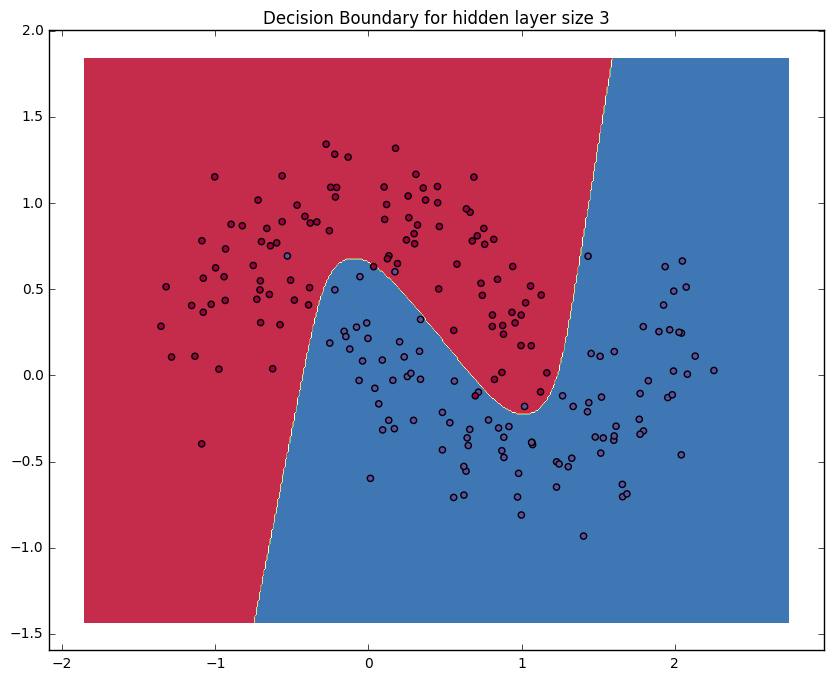

In [268]:
# Build a model with a 3-dimensional hidden layer
model = build_model(np.array([3]), print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

instantiating random weights...
predicting...
instantiating random weights...
predicting...
instantiating random weights...
predicting...
instantiating random weights...
predicting...
instantiating random weights...
predicting...
instantiating random weights...
predicting...
instantiating random weights...
predicting...


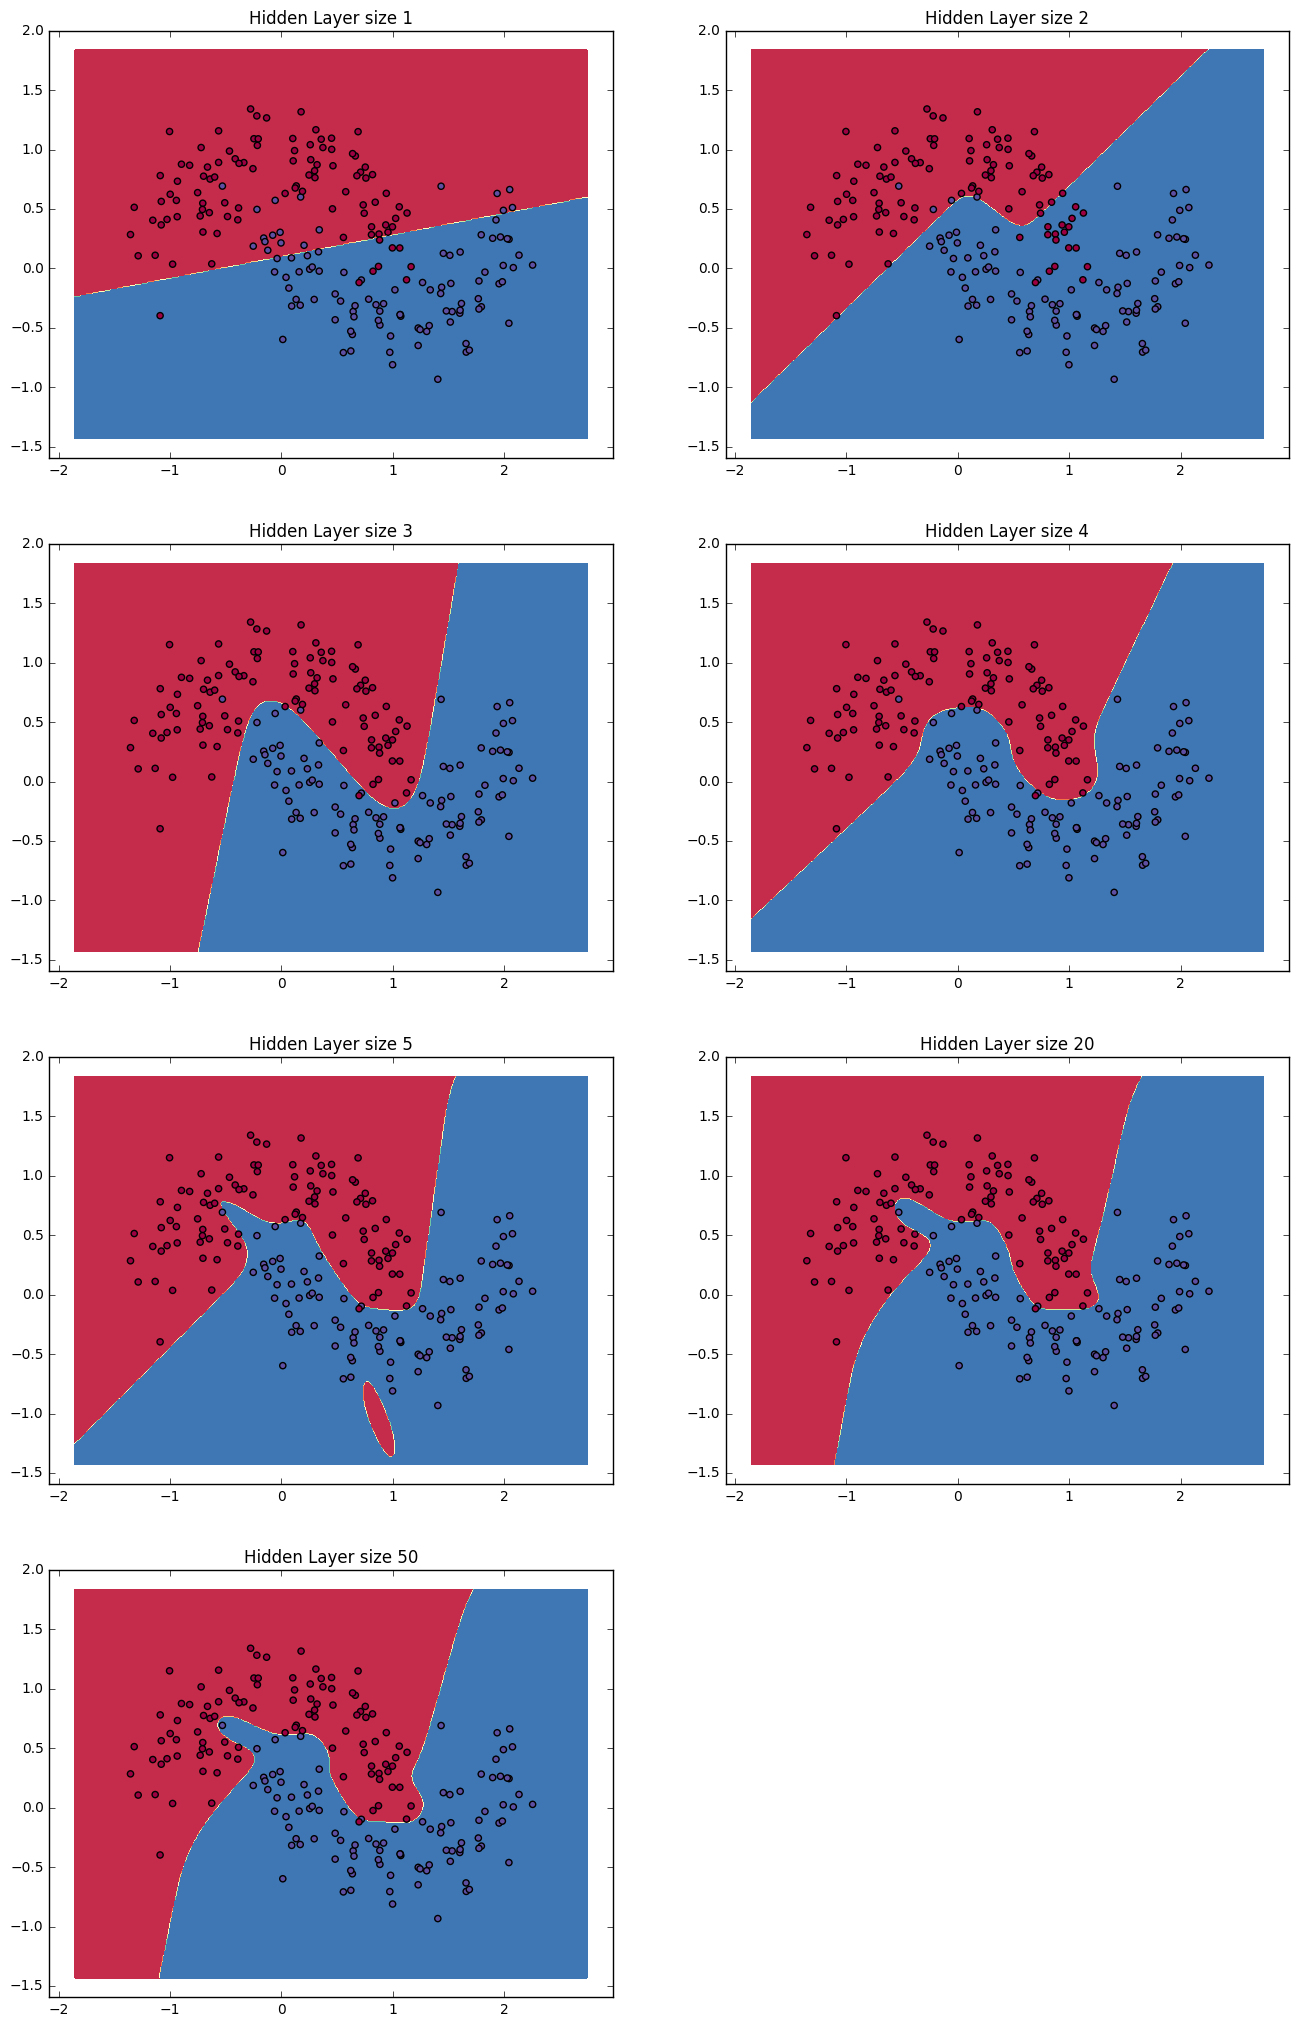

In [272]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(np.array([nn_hdim]))
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

instantiating random weights...
instantiating random weights...
Loss after iteration  0 :  0.672214851693
Loss after iteration  1000 :  0.0572690047113
Loss after iteration  2000 :  0.0370284290642
Loss after iteration  3000 :  0.0286558829286
Loss after iteration  4000 :  0.0183113388884
Loss after iteration  5000 :  0.019337426313
Loss after iteration  6000 :  0.0207541892986
Loss after iteration  7000 :  0.0223660177182
Loss after iteration  8000 :  0.0215969817256
Loss after iteration  9000 :  0.0207130450357
Loss after iteration  10000 :  0.0528815164848
Loss after iteration  11000 :  0.0278584319533
Loss after iteration  12000 :  0.026955792319
Loss after iteration  13000 :  0.0191468576706
Loss after iteration  14000 :  0.020446436296
Loss after iteration  15000 :  0.0207057092956
Loss after iteration  16000 :  0.0190366310417
Loss after iteration  17000 :  0.0231043297009
Loss after iteration  18000 :  0.0288900415103
Loss after iteration  19000 :  0.0212313451385
predicting...

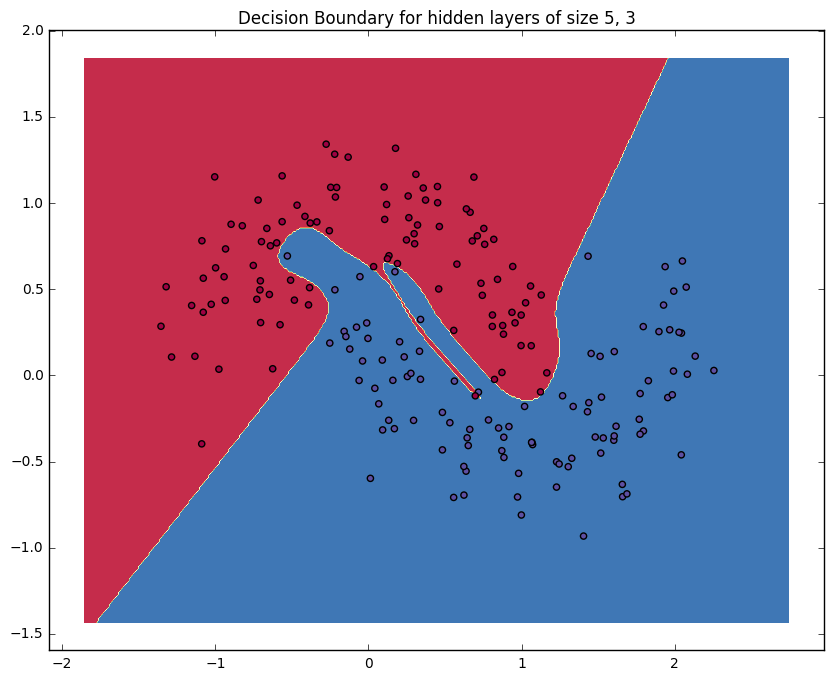

In [282]:
model = build_model(np.array([5,3]), print_loss=True)
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layers of size 5, 3")

instantiating random weights...
instantiating random weights...
instantiating random weights...
Loss after iteration  0 :  0.483704366797
Loss after iteration  1000 :  0.128064399172
Loss after iteration  2000 :  0.049650363762
Loss after iteration  3000 :  0.0488912353079
Loss after iteration  4000 :  0.0541764286277
Loss after iteration  5000 :  0.0773980101719
Loss after iteration  6000 :  0.0466264605763
Loss after iteration  7000 :  0.0464248625673
Loss after iteration  8000 :  0.0472202811695
Loss after iteration  9000 :  0.0466458075454
Loss after iteration  10000 :  0.0481841876262
Loss after iteration  11000 :  0.0478184036054
Loss after iteration  12000 :  0.107171539212
Loss after iteration  13000 :  0.0443496241519
Loss after iteration  14000 :  0.0495855405093
Loss after iteration  15000 :  0.0439207268745
Loss after iteration  16000 :  0.0445043657488
Loss after iteration  17000 :  0.0478886979776
Loss after iteration  18000 :  0.0503018107967
Loss after iteration  19000 

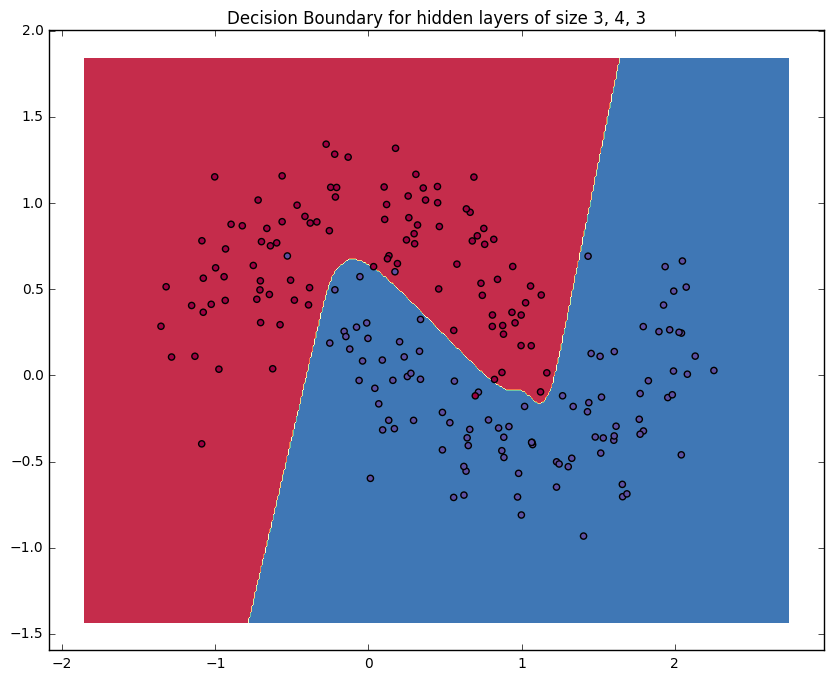

In [281]:
model = build_model(np.array([3,4,3]), print_loss=True)
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layers of size 3, 4, 3")

instantiating random weights...
instantiating random weights...
instantiating random weights...
Loss after iteration  0 :  0.561924654405
Loss after iteration  1000 :  0.0369764774675
Loss after iteration  2000 :  0.030860642001
Loss after iteration  3000 :  0.0191714592045
Loss after iteration  4000 :  0.0176608408245
Loss after iteration  5000 :  0.0155212202541
Loss after iteration  6000 :  0.0149401402387
Loss after iteration  7000 :  0.0146316910208
Loss after iteration  8000 :  0.0144068005034
Loss after iteration  9000 :  0.014229825542
Loss after iteration  10000 :  0.0933029090343
Loss after iteration  11000 :  0.050691601917
Loss after iteration  12000 :  0.0461461606775
Loss after iteration  13000 :  0.116728902739
Loss after iteration  14000 :  0.101283534577
Loss after iteration  15000 :  0.0458448817442
Loss after iteration  16000 :  0.136818413632
Loss after iteration  17000 :  0.0786423737151
Loss after iteration  18000 :  0.0540866138912
Loss after iteration  19000 :  

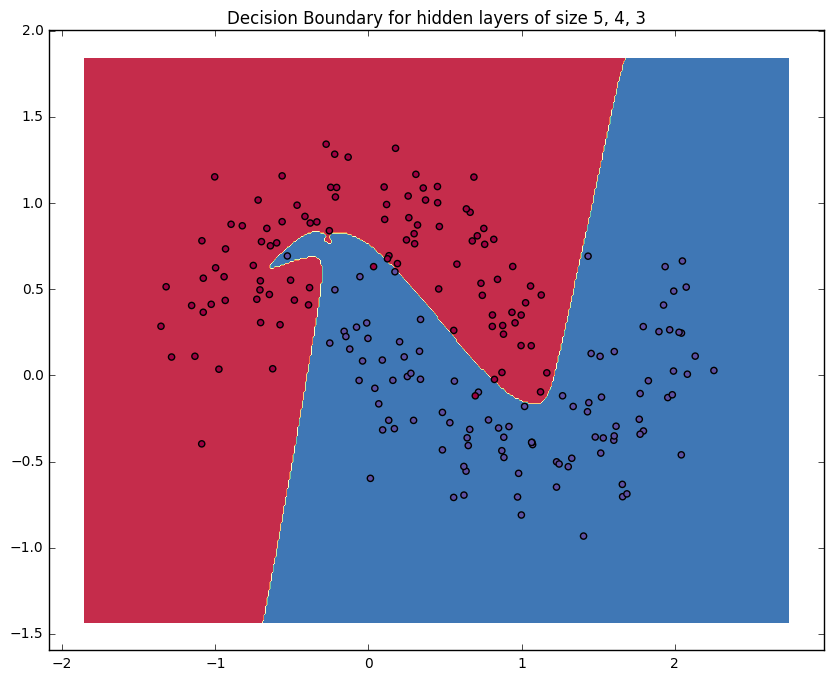

In [280]:
model = build_model(np.array([5,4,3]), print_loss=True)
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layers of size 5, 4, 3")

instantiating random weights...
instantiating random weights...
instantiating random weights...
instantiating random weights...
Loss after iteration  0 :  0.402776211209
Loss after iteration  1000 :  0.074022762141
Loss after iteration  2000 :  0.0513823841148
Loss after iteration  3000 :  0.054454467927
Loss after iteration  4000 :  0.124814451062
Loss after iteration  5000 :  0.115112059609
Loss after iteration  6000 :  0.0559476993058
Loss after iteration  7000 :  0.0912800419875
Loss after iteration  8000 :  0.120921102226
Loss after iteration  9000 :  0.0554421512482
Loss after iteration  10000 :  0.0905994010734
Loss after iteration  11000 :  0.0757676007334
Loss after iteration  12000 :  0.0382734633072
Loss after iteration  13000 :  0.10965019305
Loss after iteration  14000 :  0.0916199331493
Loss after iteration  15000 :  0.0761346930571
Loss after iteration  16000 :  0.0747145667093
Loss after iteration  17000 :  0.142887261118
Loss after iteration  18000 :  0.0873790105903
L

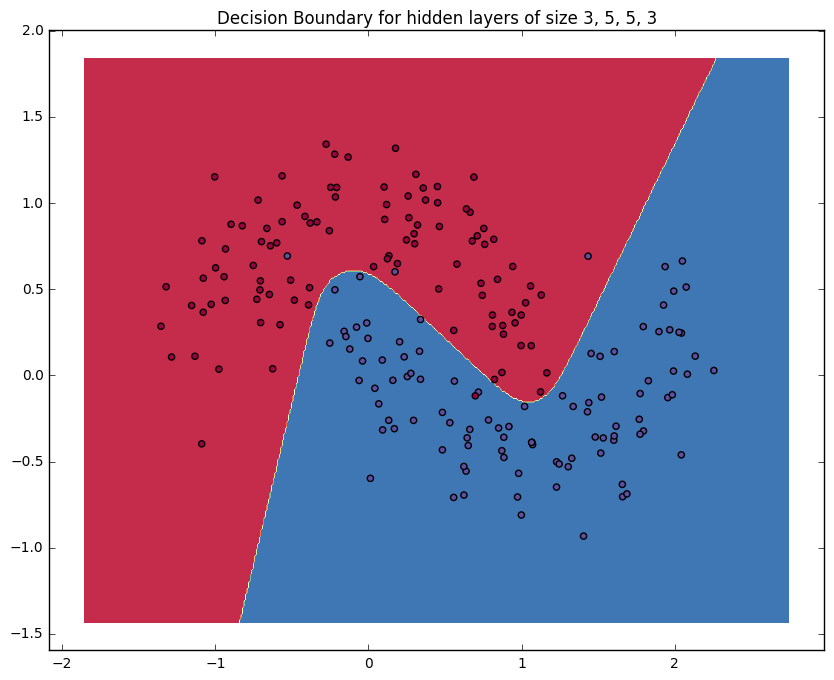

In [279]:
model = build_model(np.array([3,5,5,3]), print_loss=True)
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layers of size 3, 5, 5, 3")

instantiating random weights...
instantiating random weights...
instantiating random weights...
instantiating random weights...
instantiating random weights...
Loss after iteration  0 :  0.719198824905
Loss after iteration  1000 :  0.0369855982593
Loss after iteration  2000 :  0.0271672244423
Loss after iteration  3000 :  0.042900218742
Loss after iteration  4000 :  0.0424893927418
Loss after iteration  5000 :  0.0413093292753
Loss after iteration  6000 :  0.0404389151269
Loss after iteration  7000 :  0.0397702344613
Loss after iteration  8000 :  0.0392662763719
Loss after iteration  9000 :  0.0388890751287
Loss after iteration  10000 :  0.0386025637649
Loss after iteration  11000 :  0.038380524799
Loss after iteration  12000 :  0.0382048543189
Loss after iteration  13000 :  0.0380639360415
Loss after iteration  14000 :  0.0466540102988
Loss after iteration  15000 :  0.0453693164598
Loss after iteration  16000 :  0.0446264919161
Loss after iteration  17000 :  0.0459384900415
Loss after

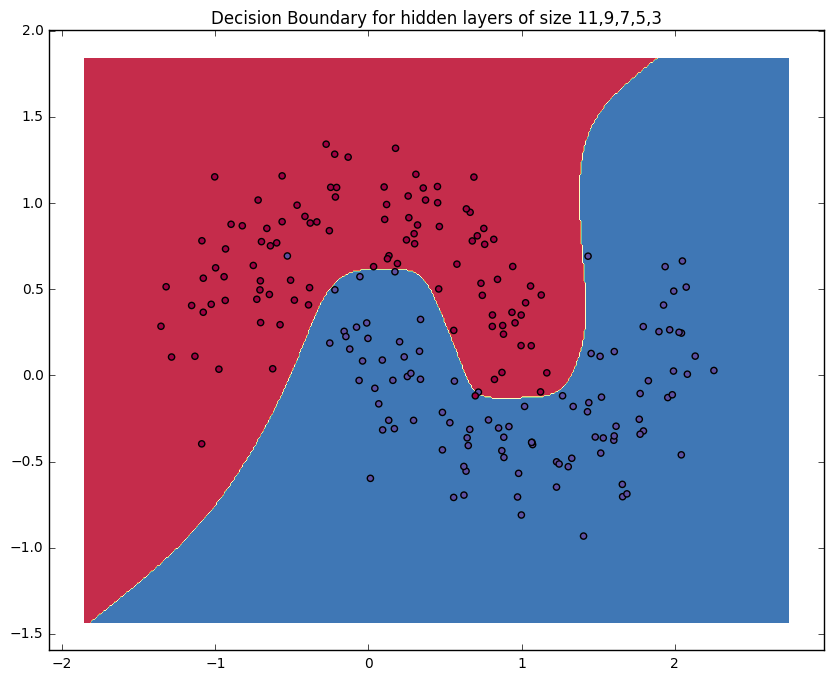

In [283]:
model = build_model(np.array([11,9,7,5,3]), print_loss=True)
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layers of size 11,9,7,5,3")